<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第9课 机器学习</h1>
# <center>回归分析</center>


预测与类分类类似，但是模型适合连续的/数值的/有序的值预测。

#### 关于本笔记
在这个笔记本中，我们下载了一个数据集，它与汽车的燃料消耗和二氧化碳排放有关。然后，我们将数据分解为训练和测试集，使用训练集创建模型，使用测试集评估模型，然后使用测试集验证模型。最后使用模型进行预测。


### 加载所需库

statsmomodels是一个Python模块，它允许用户查看数据、预测统计模型和执行测试。


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### 下载数据

In [2]:
 !wget -O ../data/FuelConsumption.csv https://ibm.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv

--2017-12-24 14:42:23--  https://ibm.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv
正在解析主机 ibm.box.com (ibm.box.com)... 107.152.24.197
正在连接 ibm.box.com (ibm.box.com)|107.152.24.197|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 301 Moved Permanently
位置：https://ibm.ent.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv [跟随至新的 URL]
--2017-12-24 14:42:24--  https://ibm.ent.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv
正在解析主机 ibm.ent.box.com (ibm.ent.box.com)... 107.152.24.211
正在连接 ibm.ent.box.com (ibm.ent.box.com)|107.152.24.211|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 302 Found
位置：https://public.boxcloud.com/d/1/mg0h7BtZlyIBCzq231lirNuoVKr05Bt4kHZ0buwNfWtEV4DJtuBVn_eml7n35ej8YnBLKrWE-aeBZ3-jV9x7rOFufPP7RtxzPqoAsv30KBVdB0f1XybJ3KMux9oDR3b3FFz7OirChEYLdWCf9wghBes_gzmO-Gqj9HVxcoL82LJiJyVuqE-69klI7b7R7rA1bKaYTzgtLBX4AKRVfKIYgHuX1MksPsdQt2N9a8B5GI5M3VMVfFtDtpuphfwwpnGIg-lwVJQTP7D51lLBXlELirvFhmK1kdSkDyRu-xbloxcBVX3uxL0FoEdBIK-686YFH7inqzmurnEPljgmyO3-FmYRmNe_NeJNgiTEtxLezKNpdTM


## 了解数据

### `FuelConsumptionCo2.csv`:
我们下载了一个燃料消耗的数据集，包括了特定车型的燃油消耗率，以及在加拿大零售销售的新轻型车辆的二氧化碳排放量。 [数据源](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** 年份 e.g. 2014
- **MAKE**  制造商 e.g. Acura
- **MODEL** 车型 e.g. ILX
- **VEHICLE CLASS** 车类 e.g. SUV
- **ENGINE SIZE** 发动机大小 e.g. 4.7
- **CYLINDERS** 汽缸 e.g 6
- **TRANSMISSION** 变速器 e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** 城市道路百公里油耗 e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** 告诉公路百公里油耗 e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** 综合路况百公里油耗 e.g. 9.2
- **CO2 EMISSIONS (g/km)**二氧化碳排放 e.g. 182  


## 读取数据

In [3]:
#linux df = pd.read_csv("/resources/FuelConsumption.csv") 
df = pd.read_csv("../data/FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### 数据探索

In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


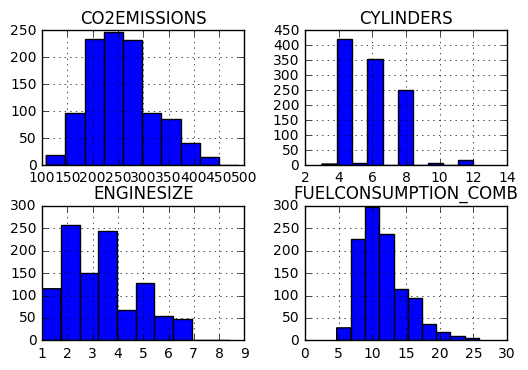

In [6]:
viz=cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

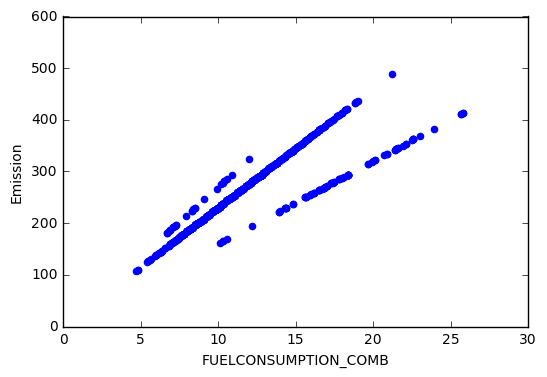

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

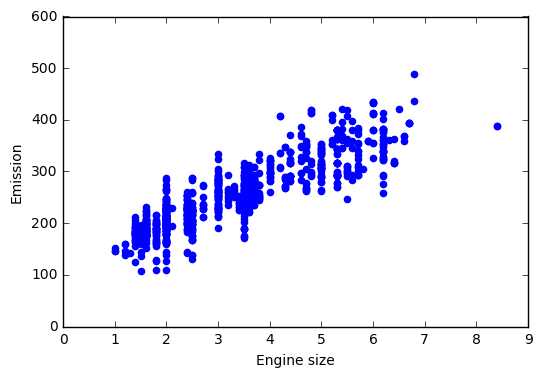

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

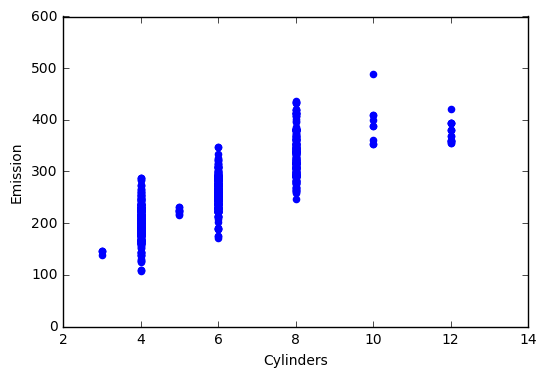

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#### 创建训练和测试数据集

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### 简单回归模型
### 关于线性回归
线性回归是一个线性模型，其系数为B = (B1, ..., Bn)，目的是最小化拟合曲线在每个x上的对应的预测y值与实际y之间的方差的和。

#### 训练数据的分布

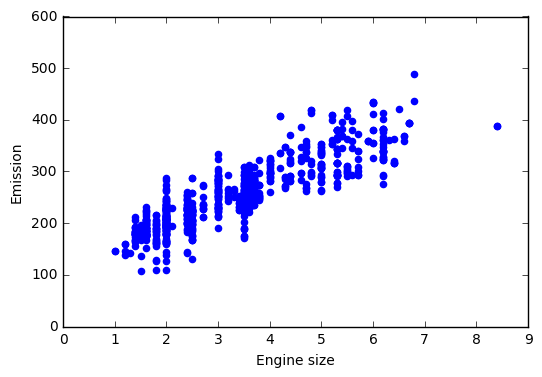

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### 建模
使用sklearn对数据建模

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[ 39.23399336]]
Intercept:  [ 124.67781724]


In [13]:
train_x

array([[ 2. ],
       [ 1.5],
       [ 3.5],
       [ 3.5],
       [ 3.7],
       [ 2.4],
       [ 2.4],
       [ 5.9],
       [ 5.9],
       [ 4.7],
       [ 4.7],
       [ 4.7],
       [ 5.9],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 3. ],
       [ 3. ],
       [ 3. ],
       [ 3. ],
       [ 4. ],
       [ 3. ],
       [ 3. ],
       [ 4. ],
       [ 6.3],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 3. ],
       [ 3. ],
       [ 4.2],
       [ 4.2],
       [ 5.2],
       [ 5.2],
       [ 4.2],
       [ 4.2],
       [ 5.2],
       [ 5.2],
       [ 4.2],
       [ 4. ],
       [ 3. ],
       [ 3. ],
       [ 3. ],
       [ 4. ],
       [ 4. ],
       [ 4. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 4. ],
       [ 6. ],
       [ 4. ],
       [ 6. ],
       [ 4. ],
       [ 6. ],
       [ 6.8],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2

#### 绘制输出

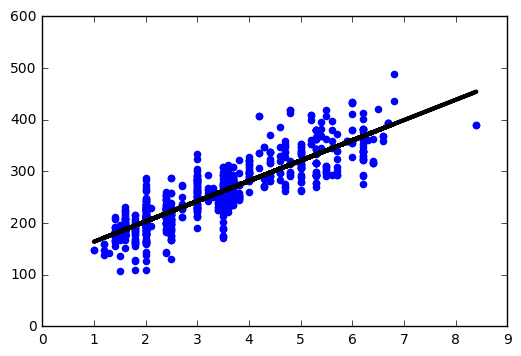

In [14]:
train_y_=regr.predict(train_x)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, train_y_ , color='black',linewidth=3)

#### 评估
使用测试数据评估模型

Residual sum of squares: 941.14
Variance score: 0.76


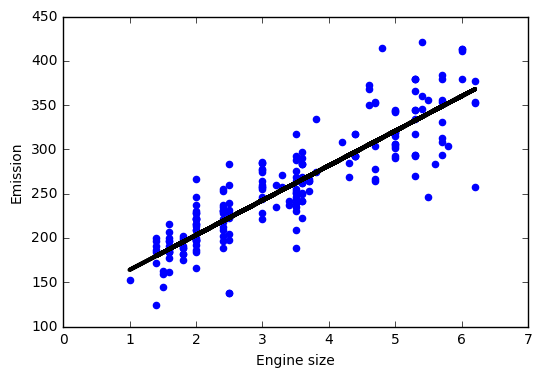

In [15]:
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=regr.predict(test_x)


print("Residual sum of squares: %.2f"
      % np.mean((test_y_ - test_y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))
# Plot outputs
plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, test_y_, color='black', linewidth=3)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


__解释方差回归分数（explained variance regression score）:__  
如果 $\hat{y}$ 是预测的目标输出, y 是对应的正确的目标输出,Var是方差(标准差的平方), 那么解释方差回归分数如下：

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
最好的分数是1.0，越低表示拟合效果越差。

### 非线性回归

多项式回归是线性回归的一个特例。主要取决于你如何选择你的特征变量。看看有两个变量的多元回归:x1和x2。线性回归看起来是这样的:y=a1 \* x1 + a2 \* x2。

假设现在你想执行一个多项式回归（让我们创建一个2阶多项式），我们将添加一些额外的特征：x1\*x2, x1^2 和 x2^2，那么你的线性回归应该是：
y = a1 \* x1 + a2 \* x2 + a3 \* x1 \*x2 + a4 \* x1^2 + a5 \* x2^2

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

In [17]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

### 测试

In [18]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

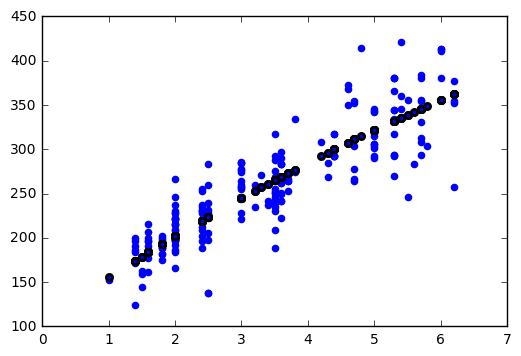

In [19]:
plt.scatter(test_x, test_y,  color='blue')
plt.scatter(test_x, test_y_, linewidth=2)

### 多元回归模型


In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [[ 10.74602449   6.88715976  10.37720213]]


In [21]:
y_=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_ - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))



Residual sum of squares: 605.00
Variance score: 0.85
